<a href="https://colab.research.google.com/github/EsraKantarci/SpeedDating101/blob/main/SpeedDating.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Dataset: https://www.kaggle.com/annavictoria/speed-dating-experiment

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import sys
import math
import datetime

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
# bibliografi: https://www.kaggle.com/lucabasa/the-data-science-book-of-love
# https://www.kaggle.com/aeshen/the-secret-to-getting-the-second-date


In [ ]:
#Data preprocessing step 1: Data should be splitted by "," as seperator. Else, it gives error and cannot read.

data = pd.read_csv("speed.csv", sep=',', engine='python')
data.head()
data.isnull().sum()

iid            0
id             1
gender         0
idg            0
condtn         0
            ... 
attr5_3     6362
sinc5_3     6362
intel5_3    6362
fun5_3      6362
amb5_3      6362
Length: 195, dtype: int64

In [ ]:
columns_choice = [
'age_o',
'race_o',
'dec_o',
'like',
'prob']

columns_hobby = [
'sports',
'tvsports',
'exercise',
'dining',
'museums',
'art',
'hiking',
'gaming',
'clubbing', 
'reading',
'tv',
'theater',
'movies',
'concerts',
'music',
'shopping',
'yoga',
'go_out',
'date'      
]

columns_fundamental = [
'iid',
'age',
'gender',
'idg', 
'pid',
'match',
'samerace',
'field_cd',
'race',
'imprace',
'imprelig',
'goal',
'date',
'go_out',
'career_c',
'dec',
'attr',
'sinc',
'intel',
'fun',
'amb',
'you_call',
'them_cal',
'date_3',
'numdat_3'
]

columns_result = [
'like',
'prob'
]


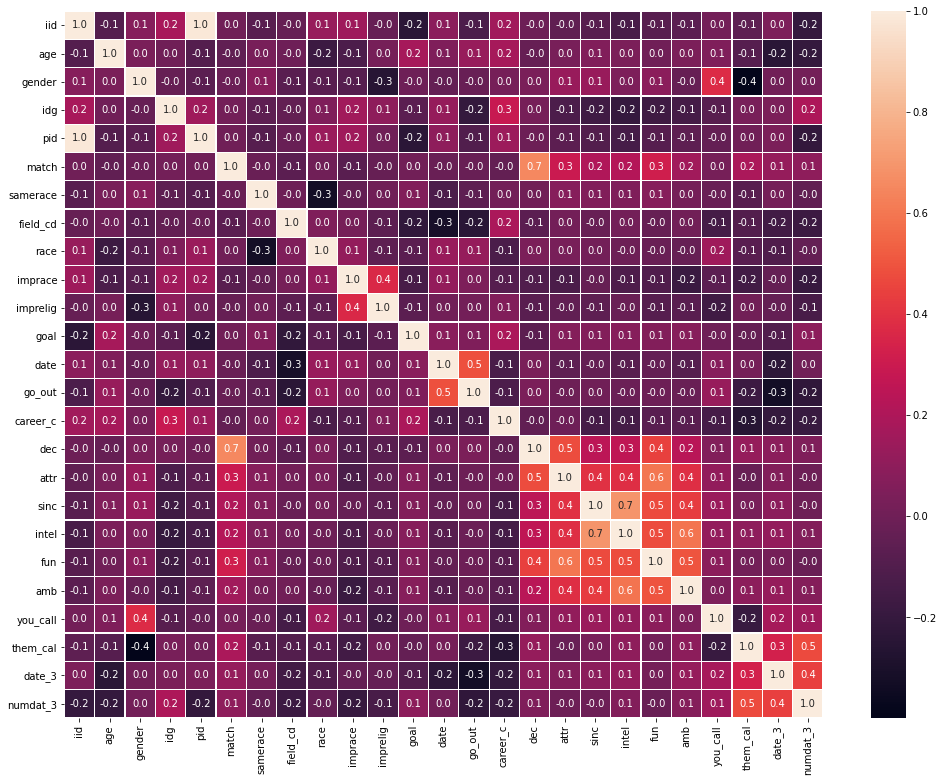

In [ ]:
data = pd.read_csv("speed.csv", sep=',', engine='python')
data = data[columns_fundamental]
data.dropna(inplace=True)

x, ax= plt.subplots(figsize= (17,13))
sns.heatmap(data.corr(), annot= True, 
            linewidths= .2, fmt= ".1f", ax=ax)
plt.show()

In [ ]:
!sudo apt-get install build-essential swig
!curl https://raw.githubusercontent.com/automl/auto-sklearn/master/requirements.txt | xargs -n 1 -L 1 pip install
!pip install auto-sklearn

for _ in range(3):
    try:
        import autosklearn.classification
        break
    except:
        pass
else:
    raise ImportError("failed to import from autosklearn")

Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.4ubuntu1).
swig is already the newest version (3.0.12-1).
0 upgraded, 0 newly installed, 0 to remove and 13 not upgraded.
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   207  100   207    0     0   3905      0 --:--:-- --:--:-- --:--:--  3905
  Using cached https://files.pythonhosted.org/packages/e2/4c/6111b9a325f29527d7f262e2ee8c730d354b47a728d955e186dacad57a0d/scikit_learn-0.24.1-cp36-cp36m-manylinux2010_x86_64.whl
ERROR: auto-sklearn 0.10.0 has requirement scikit-learn<0.23,>=0.22.0, but you'll have scikit-learn 0.24.1 which is incompatible.
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
  Using cached https://files.

Name: scikit-learn
Version: 0.22.2.post1
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: None
Author-email: None
License: new BSD
Location: /usr/local/lib/python3.6/dist-packages
Requires: numpy, joblib, scipy
Required-by: yellowbrick, umap-learn, textgenrnn, smac, sklearn, sklearn-pandas, mlxtend, lucid, lightgbm, librosa, imbalanced-learn, fancyimpute, auto-sklearn


In [ ]:
!sudo apt-get install build-essential swig 
!curl https://raw.githubusercontent.com/automl/auto-sklearn/master/requirements.txt | xargs -n 1 -L 1 pip install 
!pip install auto-sklearn==0.10.0

Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.4ubuntu1).
swig is already the newest version (3.0.12-1).
0 upgraded, 0 newly installed, 0 to remove and 13 not upgraded.
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   207  100   207    0     0   2653      0 --:--:-- --:--:-- --:--:--  2653
  Using cached https://files.pythonhosted.org/packages/e2/4c/6111b9a325f29527d7f262e2ee8c730d354b47a728d955e186dacad57a0d/scikit_learn-0.24.1-cp36-cp36m-manylinux2010_x86_64.whl
ERROR: auto-sklearn 0.10.0 has requirement scikit-learn<0.23,>=0.22.0, but you'll have scikit-learn 0.24.1 which is incompatible.
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
  Using cached https://files.

In [ ]:
import autosklearn

In [ ]:
from sklearn.ensemble import RandomForestClassifier
data2 = pd.read_csv("speed.csv", sep=',', engine='python')
X = data2[columns_fundamental]
y = data2[columns_result]

X.head()

,iid,age,gender,idg,pid,match,samerace,field_cd,race,imprace,imprelig,goal,date,go_out,career_c,dec,attr,sinc,intel,fun,amb,you_call,them_cal,date_3,numdat_3
0,1,21.0,0,1,11.0,0,0,1.0,4.0,2.0,4.0,2.0,7.0,1.0,NaN,1,6.0,9.0,7.0,7.0,6.0,1.0,1.0,0.0,NaN
1,1,21.0,0,1,12.0,0,0,1.0,4.0,2.0,4.0,2.0,7.0,1.0,NaN,1,7.0,8.0,7.0,8.0,5.0,1.0,1.0,0.0,NaN
2,1,21.0,0,1,13.0,1,1,1.0,4.0,2.0,4.0,2.0,7.0,1.0,NaN,1,5.0,8.0,9.0,8.0,5.0,1.0,1.0,0.0,NaN
3,1,21.0,0,1,14.0,1,0,1.0,4.0,2.0,4.0,2.0,7.0,1.0,NaN,1,7.0,6.0,8.0,7.0,6.0,1.0,1.0,0.0,NaN
4,1,21.0,0,1,15.0,1,0,1.0,4.0,2.0,4.0,2.0,7.0,1.0,NaN,1,5.0,6.0,7.0,7.0,6.0,1.0,1.0,0.0,NaN


In [ ]:
y.dropna()

,like,prob
0,7.0,6.0
1,7.0,5.0
3,7.0,6.0
4,6.0,6.0
5,6.0,5.0
...,...,...
8373,2.0,5.0
8374,4.0,4.0
8375,6.0,5.0
8376,5.0,5.0


In [ ]:
X.isnull().sum()

iid            0
age           95
gender         0
idg            0
pid           10
match          0
samerace       0
field_cd      82
race          63
imprace       79
imprelig      79
goal          79
date          97
go_out        79
career_c     138
dec            0
attr         202
sinc         277
intel        296
fun          350
amb          712
you_call    4404
them_cal    4404
date_3      4404
numdat_3    6882
dtype: int64

In [ ]:
X.fillna(value=X.mean(), inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [ ]:
X.isnull().sum()

iid         0
age         0
gender      0
idg         0
pid         0
match       0
samerace    0
field_cd    0
race        0
imprace     0
imprelig    0
goal        0
date        0
go_out      0
career_c    0
dec         0
attr        0
sinc        0
intel       0
fun         0
amb         0
you_call    0
them_cal    0
date_3      0
numdat_3    0
dtype: int64

In [ ]:
y.fillna(value=y.mean(), inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [ ]:
X.head()

,iid,age,gender,idg,pid,match,samerace,field_cd,race,imprace,imprelig,goal,date,go_out,career_c,dec,attr,sinc,intel,fun,amb,you_call,them_cal,date_3,numdat_3
0,1,21.0,0,1,11.0,0,0,1.0,4.0,2.0,4.0,2.0,7.0,1.0,5.277791,1,6.0,9.0,7.0,7.0,6.0,1.0,1.0,0.0,1.230615
1,1,21.0,0,1,12.0,0,0,1.0,4.0,2.0,4.0,2.0,7.0,1.0,5.277791,1,7.0,8.0,7.0,8.0,5.0,1.0,1.0,0.0,1.230615
2,1,21.0,0,1,13.0,1,1,1.0,4.0,2.0,4.0,2.0,7.0,1.0,5.277791,1,5.0,8.0,9.0,8.0,5.0,1.0,1.0,0.0,1.230615
3,1,21.0,0,1,14.0,1,0,1.0,4.0,2.0,4.0,2.0,7.0,1.0,5.277791,1,7.0,6.0,8.0,7.0,6.0,1.0,1.0,0.0,1.230615
4,1,21.0,0,1,15.0,1,0,1.0,4.0,2.0,4.0,2.0,7.0,1.0,5.277791,1,5.0,6.0,7.0,7.0,6.0,1.0,1.0,0.0,1.230615


In [ ]:
X.dtypes

iid           int64
age         float64
gender        int64
idg           int64
pid         float64
match         int64
samerace      int64
field_cd    float64
race        float64
imprace     float64
imprelig    float64
goal        float64
date        float64
go_out      float64
career_c    float64
dec           int64
attr        float64
sinc        float64
intel       float64
fun         float64
amb         float64
you_call    float64
them_cal    float64
date_3      float64
numdat_3    float64
dtype: object

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, X_test.shape)

(6702, 25) (1676, 25) (6702, 2) (1676, 25)


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor

In [ ]:
reg = RandomForestRegressor(random_state=42)
reg.fit(X_train, y_train)
reg.predict(X_test)

reg.score(X_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


0.5008366354541598

In [ ]:
X.columns

Index(['iid', 'age', 'gender', 'idg', 'pid', 'match', 'samerace', 'field_cd',
       'race', 'imprace', 'imprelig', 'goal', 'date', 'go_out', 'career_c',
       'dec', 'attr', 'sinc', 'intel', 'fun', 'amb', 'you_call', 'them_cal',
       'date_3', 'numdat_3'],
      dtype='object')

In [ ]:
columns_important = ["gender", "race", "samerace", "age", "you_call", "them_cal", "go_out", "date", "intel_o", "sinc_o", "fun_o", "shar_o", "amb_o"]

In [ ]:
data3 = pd.read_csv("speed.csv", sep=',', engine='python')
data3.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,...,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9.0,8.0,7.0,7.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,5,15.0,1,0.21,0,24.0,3.0,30.0,10.0,20.0,10.0,10.0,20.0,1,8.0,7.0,9.0,6.0,9.0,7.0,8.0,6.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
X = data3[columns_hobby]
y = data3['prob']

X.head()

y.fillna(value=y.mean(), inplace=True)
X.fillna(value=X.mean(), inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, X_test.shape)

(6702, 19) (1676, 19) (6702,) (1676, 19)


In [ ]:
reg = RandomForestRegressor(random_state=42)
reg.fit(X_train, y_train)
reg.predict(X_test)


reg.score(X_test, y_test)

0.35835225028758017

In [ ]:
from sklearn.svm import SVR

svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1,
               coef0=1)

In [ ]:
lw = 2

svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ['RBF', 'Linear', 'Polynomial']
model_color = ['m', 'c', 'g']

In [ ]:
regr = svm.SVR()
regr.fit(X_train, y_train)
SVR()
A = regr.predict(X_test)

A

array([6.43852457, 5.3078944 , 7.14050103, ..., 5.90036479, 4.90017225,
       5.89975055])

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

regression_model = LinearRegression()
# fit the data(train the model)
regression_model.fit(X_train, y_train)
# predict
y_predicted = regression_model.predict(X_test)

# model evaluation
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

# printing values
print('The coefficient is {}'.format(regression_model.coef_))
print('The intercept is {}'.format(regression_model.intercept_))
print('Root mean squared error of the model is {}.'.format(rmse))
print('R-squared score is {}.'.format(r2))

The coefficient is [ 0.06949509 -0.02652005  0.037883    0.06630763 -0.03100704  0.01067155
 -0.01409563  0.01721239  0.03519476  0.02180291 -0.02857886  0.0029258
 -0.05732876  0.04642263  0.05586239  0.06527412  0.02185751 -0.05058504
 -0.09739648]
The intercept is 3.892102630767917
Root mean squared error of the model is 4.102908532760936.
R-squared score is 0.05904090638981396.


In [ ]:
import sklearn
import sklearn.metrics
import autosklearn.regression

In [ ]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, random_state=1)
automl = autosklearn.regression.AutoSklearnRegressor(
        time_left_for_this_task=120,
        per_run_time_limit=30,
        tmp_folder='/tmp/autosklearn_tmp',
        output_folder='/tmp/autosklearn_out',)

automl.fit(X_train, y_train, dataset_name='earthquake')
print(automl.show_models())
predictions = automl.predict(X_test)

print("R2 score:", sklearn.metrics.r2_score(y_test, predictions))

[(0.820000, SimpleRegressionPipeline({'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'one_hot_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'minority_coalescer', 'data_preprocessing:numerical_transformer:imputation:strategy': 'mean', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'standardize', 'feature_preprocessor:__choice__': 'no_preprocessing', 'regressor:__choice__': 'random_forest', 'data_preprocessing:categorical_transformer:category_coalescence:minority_coalescer:minimum_fraction': 0.01, 'regressor:random_forest:bootstrap': 'True', 'regressor:random_forest:criterion': 'mse', 'regressor:random_forest:max_depth': 'None', 'regressor:random_forest:max_features': 1.0, 'regressor:random_forest:max_leaf_nodes': 'None', 'regressor:random_forest:min_impurity_decrease': 0.0, 'regressor:random_forest:min_samples_leaf': 1, 'regressor:random_forest:min_samples_split': 2, 'regressor:random_forest:min_

In [ ]:
automl.cv_results_
automl.sprint_statistics()
automl.show_models()

"[(0.820000, SimpleRegressionPipeline({'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'one_hot_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'minority_coalescer', 'data_preprocessing:numerical_transformer:imputation:strategy': 'mean', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'standardize', 'feature_preprocessor:__choice__': 'no_preprocessing', 'regressor:__choice__': 'random_forest', 'data_preprocessing:categorical_transformer:category_coalescence:minority_coalescer:minimum_fraction': 0.01, 'regressor:random_forest:bootstrap': 'True', 'regressor:random_forest:criterion': 'mse', 'regressor:random_forest:max_depth': 'None', 'regressor:random_forest:max_features': 1.0, 'regressor:random_forest:max_leaf_nodes': 'None', 'regressor:random_forest:min_impurity_decrease': 0.0, 'regressor:random_forest:min_samples_leaf': 1, 'regressor:random_forest:min_samples_split': 2, 'regressor:random_forest:min

In [ ]:
columns_call = ["gender","you_call", "them_cal", "date_3", "numdat_3"]

In [ ]:
data4 = data3[columns_call]
data4.head()

,gender,you_call,them_cal,date_3,numdat_3
0,0,1.0,1.0,0.0,NaN
1,0,1.0,1.0,0.0,NaN
2,0,1.0,1.0,0.0,NaN
3,0,1.0,1.0,0.0,NaN
4,0,1.0,1.0,0.0,NaN


In [ ]:
data4.fillna(value=data4.mean(), inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [ ]:
data4.corr()

,gender,you_call,them_cal,date_3,numdat_3
gender,1.000000,0.222000,-0.178654,0.000021,0.000044
you_call,0.222000,1.000000,0.094235,0.272373,0.103102
them_cal,-0.178654,0.094235,1.000000,0.490893,0.358835
date_3,0.000021,0.272373,0.490893,1.000000,0.207522
numdat_3,0.000044,0.103102,0.358835,0.207522,1.000000


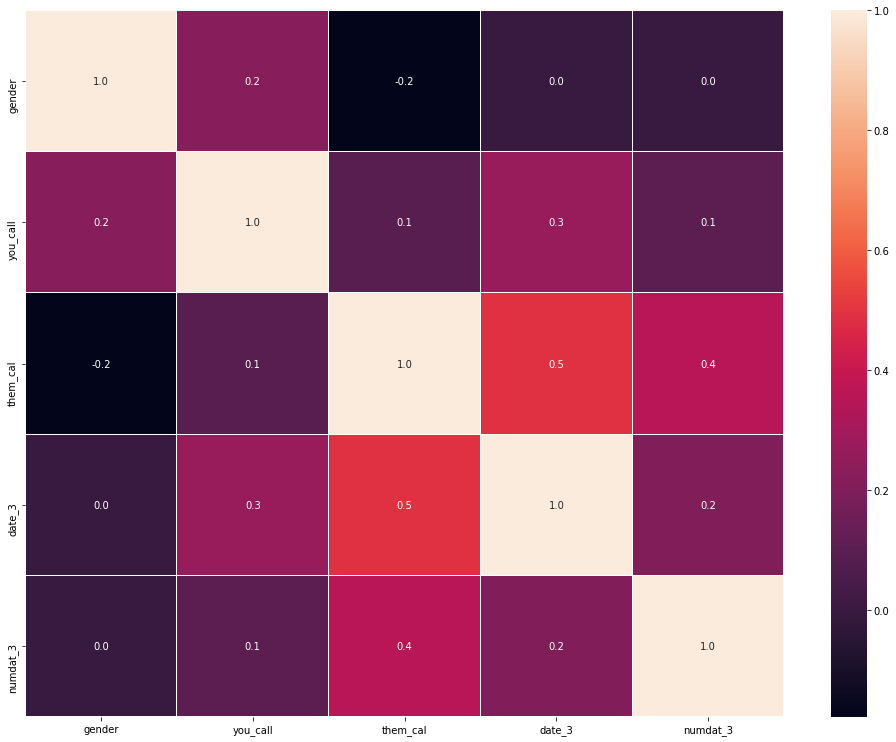

In [ ]:
x, ax= plt.subplots(figsize= (17,13))
sns.heatmap(data4.corr(), annot= True, 
            linewidths= .2, fmt= ".1f", ax=ax)
plt.show()

Text(0.5, 0.98, 'Will you call?')

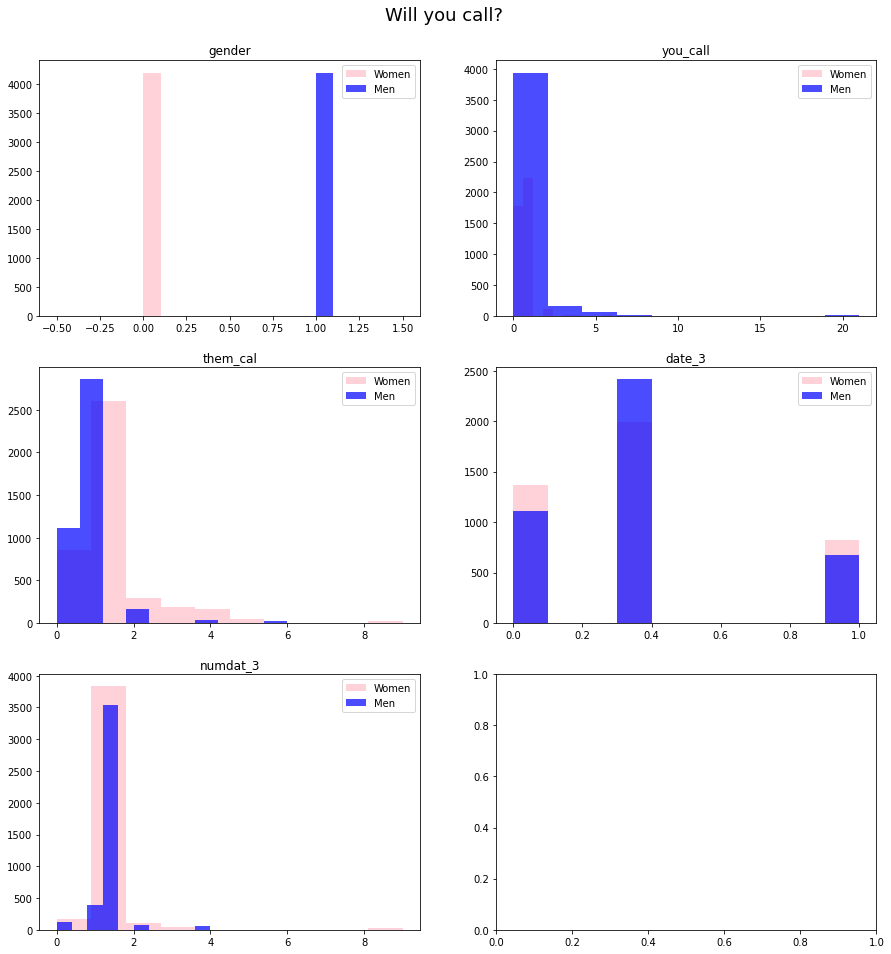

In [ ]:
num = len(columns_call)
rows = int(num/2) + (num % 2 > 0)
fig, ax = plt.subplots(rows, 2, figsize=(15, 5 * (rows)))
i = 0
j = 0
for feat in columns_call:
    data4[data4.gender==0][feat].hist(label='Women', ax=ax[i][j], color="pink", bins=10, alpha=0.7)
    data4[data4.gender==1][feat].hist(label='Men', ax=ax[i][j], color="blue", bins=10, alpha=0.7)
    ax[i][j].set_title(feat, fontsize=12)
    ax[i][j].grid(False)
    ax[i][j].legend()
    j = (j+1)%2
    i = i + 1 - j
    
plt.subplots_adjust(top=0.93)
fig.suptitle('Will you call?', fontsize=18)

In [ ]:
col_x = ["gender", "you_call", "them_cal"]
X = data4[col_x]
y = data4["date_3"]

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, random_state=1)
automl = autosklearn.regression.AutoSklearnRegressor(
        time_left_for_this_task=120,
        per_run_time_limit=30,
        tmp_folder='/tmp/autosklearn2_tmp',
        output_folder='/tmp/autosklearn2_out',)

automl.fit(X_train, y_train, dataset_name='speed')
print(automl.show_models())
predictions = automl.predict(X_test)

print("R2 score:", sklearn.metrics.r2_score(y_test, predictions))


[(0.440000, SimpleRegressionPipeline({'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'one_hot_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'no_coalescense', 'data_preprocessing:numerical_transformer:imputation:strategy': 'median', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'quantile_transformer', 'feature_preprocessor:__choice__': 'polynomial', 'regressor:__choice__': 'gradient_boosting', 'data_preprocessing:numerical_transformer:rescaling:quantile_transformer:n_quantiles': 85, 'data_preprocessing:numerical_transformer:rescaling:quantile_transformer:output_distribution': 'normal', 'feature_preprocessor:polynomial:degree': 2, 'feature_preprocessor:polynomial:include_bias': 'True', 'feature_preprocessor:polynomial:interaction_only': 'False', 'regressor:gradient_boosting:early_stop': 'valid', 'regressor:gradient_boosting:l2_regularization': 0.00018237876768886392, 'regressor:gradient_boosting:

In [ ]:
regression_model = LinearRegression()
# fit the data(train the model)
regression_model.fit(X_train, y_train)
# predict
y_predicted = regression_model.predict(X_test)

# model evaluation
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

# printing values
print('The coefficient is {}'.format(regression_model.coef_))
print('The intercept is {}'.format(regression_model.intercept_))
print('Root mean squared error of the model is {}.'.format(rmse))
print('R-squared score is {}.'.format(r2))

The coefficient is [0.02006559 0.06906943 0.16769941]
The intercept is 0.14906252720098087
Root mean squared error of the model is 0.08018664660172574.
R-squared score is 0.28827561212247366.


In [ ]:

data5 = pd.read_csv("speed.csv", sep=',', engine='python')

X = data5[columns_hobby]
y = data5["them_cal"]

y.fillna(value=y.mean(), inplace=True)
X.fillna(value=X.mean(), inplace=True)


/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [ ]:
X["gender"] = data5["gender"]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
X.corr()

,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,go_out,date,gender
sports,1.000000,0.479965,0.396333,-0.064060,-0.126004,-0.126624,0.177109,0.128643,0.049860,-0.141269,-0.097176,-0.252943,-0.154180,-0.015553,0.003097,-0.104038,-0.030816,-0.126974,-0.114060,0.231173
tvsports,0.479965,1.000000,0.227852,-0.054278,-0.080104,-0.098732,-0.012371,0.254329,0.084676,-0.157089,0.255389,-0.088705,-0.020688,0.051440,0.058985,0.039979,-0.065364,-0.011871,0.004056,0.145871
exercise,0.396333,0.227852,1.000000,0.085143,-0.007210,-0.014675,0.069015,0.007194,0.015275,0.007122,0.026171,-0.013915,-0.054629,-0.052006,0.003749,0.084926,0.111794,-0.083416,-0.088628,-0.083897
dining,-0.064060,-0.054278,0.085143,1.000000,0.386673,0.341537,0.077145,0.061606,0.231037,0.104700,0.111967,0.305682,0.231736,0.218690,0.197483,0.406903,0.174802,-0.124539,-0.128781,-0.204854
museums,-0.126004,-0.080104,-0.007210,0.386673,1.000000,0.858548,0.180012,-0.078094,0.114430,0.327652,0.026396,0.549573,0.318911,0.379148,0.271989,0.228897,0.261824,0.051146,-0.030458,-0.213385
art,-0.126624,-0.098732,-0.014675,0.341537,0.858548,1.000000,0.192367,-0.064945,0.134655,0.238423,0.018157,0.527193,0.315453,0.404713,0.293376,0.218072,0.304782,0.042417,-0.043742,-0.220803
hiking,0.177109,-0.012371,0.069015,0.077145,0.180012,0.192367,1.000000,0.157343,0.013731,0.042377,-0.147967,0.073997,0.015730,0.182721,0.048489,-0.115085,0.237838,0.039324,0.000476,-0.078913
gaming,0.128643,0.254329,0.007194,0.061606,-0.078094,-0.064945,0.157343,1.000000,0.190855,-0.062705,0.199103,-0.040095,0.015783,0.098806,0.043301,0.093467,-0.011736,0.037651,-0.056226,0.218578
clubbing,0.049860,0.084676,0.015275,0.231037,0.114430,0.134655,0.013731,0.190855,1.000000,-0.085992,0.016893,0.121981,0.116957,0.125435,0.123750,0.196580,0.073370,-0.039207,-0.086012,-0.060851
reading,-0.141269,-0.157089,0.007122,0.104700,0.327652,0.238423,0.042377,-0.062705,-0.085992,1.000000,-0.003101,0.210813,0.108737,0.091752,0.076979,-0.023544,0.068707,0.064381,0.020012,-0.112743


In [ ]:

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, random_state=1)
automl = autosklearn.regression.AutoSklearnRegressor(
        time_left_for_this_task=120,
        per_run_time_limit=30,
        tmp_folder='/tmp/autosklearn2_tmp',
        output_folder='/tmp/autosklearn2_out',)

automl.fit(X_train, y_train, dataset_name='speed')
print(automl.show_models())
predictions = automl.predict(X_test)

print("R2 score:", sklearn.metrics.r2_score(y_test, predictions))


[(1.000000, SimpleRegressionPipeline({'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'one_hot_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'minority_coalescer', 'data_preprocessing:numerical_transformer:imputation:strategy': 'mean', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'standardize', 'feature_preprocessor:__choice__': 'no_preprocessing', 'regressor:__choice__': 'random_forest', 'data_preprocessing:categorical_transformer:category_coalescence:minority_coalescer:minimum_fraction': 0.01, 'regressor:random_forest:bootstrap': 'True', 'regressor:random_forest:criterion': 'mse', 'regressor:random_forest:max_depth': 'None', 'regressor:random_forest:max_features': 1.0, 'regressor:random_forest:max_leaf_nodes': 'None', 'regressor:random_forest:min_impurity_decrease': 0.0, 'regressor:random_forest:min_samples_leaf': 1, 'regressor:random_forest:min_samples_split': 2, 'regressor:random_forest:min_

In [ ]:
regression_model = LinearRegression()
# fit the data(train the model)
regression_model.fit(X_train, y_train)
# predict
y_predicted = regression_model.predict(X_test)

# model evaluation
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

# printing values
print('The coefficient is {}'.format(regression_model.coef_))
print('The intercept is {}'.format(regression_model.intercept_))
print('Root mean squared error of the model is {}.'.format(rmse))
print('R-squared score is {}.'.format(r2))

The coefficient is [ 0.02112975  0.00487693 -0.01448262  0.01571657 -0.04299396  0.03894309
  0.02200089  0.0006139   0.02027301  0.02786883  0.00867167 -0.02700295
 -0.03905803 -0.01199077 -0.01452973 -0.0038805   0.02044231 -0.05655019
 -0.0182195  -0.38712661]
The intercept is 1.3473107885228335
Root mean squared error of the model is 0.8609284247864133.
R-squared score is 0.06509661697281999.


In [ ]:
automl.cv_results_

{'budgets': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 'mean_fit_time': array([ 8.15590692, 30.03251219,  6.65796351, 30.03163767,  6.42268538,
        24.03483033]),
 'mean_test_score': array([0.99840039, 0.        , 0.20945047, 0.        , 0.99808092,
        0.        ]),
 'param_data_preprocessing:categorical_transformer:categorical_encoding:__choice__': masked_array(data=['one_hot_encoding', 'no_encoding', 'one_hot_encoding',
                    'one_hot_encoding', 'one_hot_encoding', 'no_encoding'],
              mask=[False, False, False, False, False, False],
        fill_value='N/A',
             dtype='<U16'),
 'param_data_preprocessing:categorical_transformer:category_coalescence:__choice__': masked_array(data=['minority_coalescer', 'minority_coalescer',
                    'minority_coalescer', 'minority_coalescer',
                    'minority_coalescer', 'minority_coalescer'],
              mask=[False, False, False, False, False, False],
        fill_value='N/A',
             dty

Text(0.5, 0.98, 'How genders score their hobbies?')

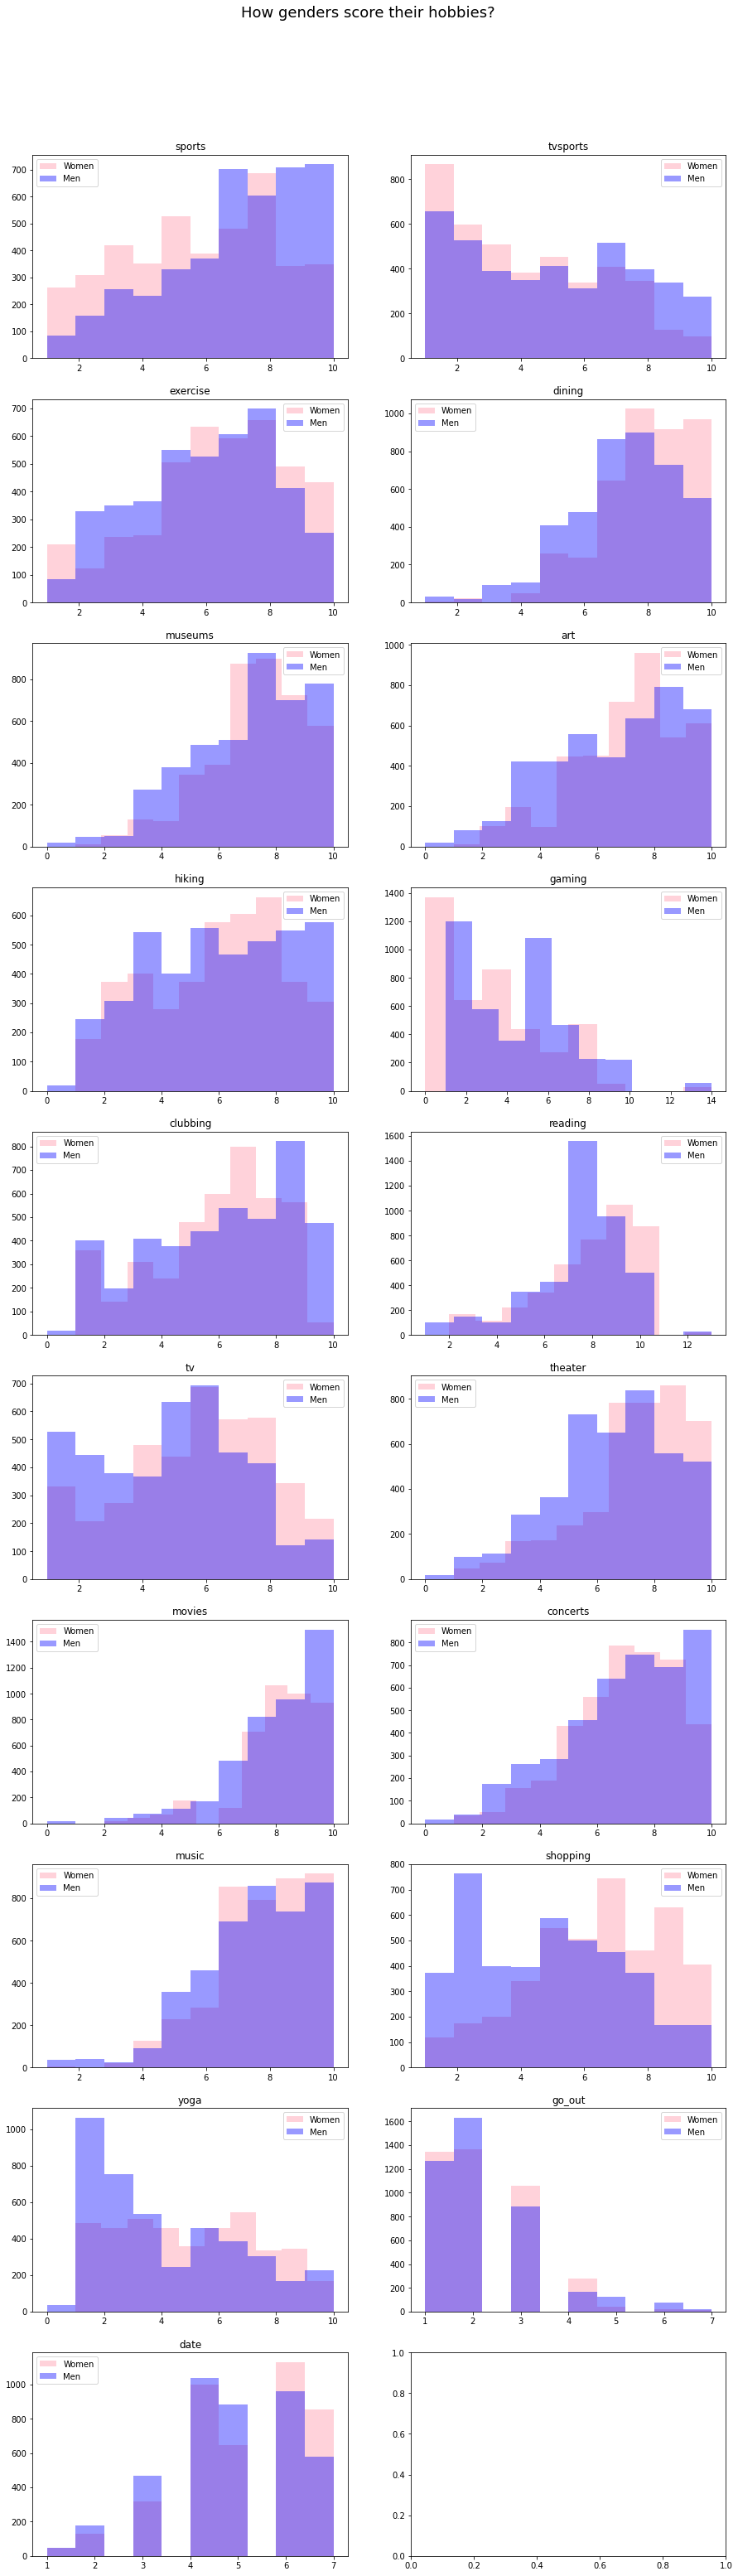

In [ ]:
num = len(columns_hobby)
rows = int(num/2) + (num % 2 > 0)
fig, ax = plt.subplots(rows, 2, figsize=(15, 5 * (rows)))
i = 0
j = 0
for feat in columns_hobby:
    data5[data5.gender==0][feat].hist(label='Women', ax=ax[i][j], color="pink", bins=10, alpha=0.7)
    data5[data5.gender==1][feat].hist(label='Men', ax=ax[i][j], color = "blue", bins=10, alpha=0.4)
    ax[i][j].set_title(feat, fontsize=12)
    ax[i][j].grid(False)
    ax[i][j].legend()
    j = (j+1)%2
    i = i + 1 - j
    
plt.subplots_adjust(top=0.93)
fig.suptitle('How genders score their hobbies?', fontsize=18)

In [ ]:
X.corr()

,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,go_out,date,gender
sports,1.000000,0.479965,0.396333,-0.064060,-0.126004,-0.126624,0.177109,0.128643,0.049860,-0.141269,-0.097176,-0.252943,-0.154180,-0.015553,0.003097,-0.104038,-0.030816,-0.126974,-0.114060,0.231173
tvsports,0.479965,1.000000,0.227852,-0.054278,-0.080104,-0.098732,-0.012371,0.254329,0.084676,-0.157089,0.255389,-0.088705,-0.020688,0.051440,0.058985,0.039979,-0.065364,-0.011871,0.004056,0.145871
exercise,0.396333,0.227852,1.000000,0.085143,-0.007210,-0.014675,0.069015,0.007194,0.015275,0.007122,0.026171,-0.013915,-0.054629,-0.052006,0.003749,0.084926,0.111794,-0.083416,-0.088628,-0.083897
dining,-0.064060,-0.054278,0.085143,1.000000,0.386673,0.341537,0.077145,0.061606,0.231037,0.104700,0.111967,0.305682,0.231736,0.218690,0.197483,0.406903,0.174802,-0.124539,-0.128781,-0.204854
museums,-0.126004,-0.080104,-0.007210,0.386673,1.000000,0.858548,0.180012,-0.078094,0.114430,0.327652,0.026396,0.549573,0.318911,0.379148,0.271989,0.228897,0.261824,0.051146,-0.030458,-0.213385
art,-0.126624,-0.098732,-0.014675,0.341537,0.858548,1.000000,0.192367,-0.064945,0.134655,0.238423,0.018157,0.527193,0.315453,0.404713,0.293376,0.218072,0.304782,0.042417,-0.043742,-0.220803
hiking,0.177109,-0.012371,0.069015,0.077145,0.180012,0.192367,1.000000,0.157343,0.013731,0.042377,-0.147967,0.073997,0.015730,0.182721,0.048489,-0.115085,0.237838,0.039324,0.000476,-0.078913
gaming,0.128643,0.254329,0.007194,0.061606,-0.078094,-0.064945,0.157343,1.000000,0.190855,-0.062705,0.199103,-0.040095,0.015783,0.098806,0.043301,0.093467,-0.011736,0.037651,-0.056226,0.218578
clubbing,0.049860,0.084676,0.015275,0.231037,0.114430,0.134655,0.013731,0.190855,1.000000,-0.085992,0.016893,0.121981,0.116957,0.125435,0.123750,0.196580,0.073370,-0.039207,-0.086012,-0.060851
reading,-0.141269,-0.157089,0.007122,0.104700,0.327652,0.238423,0.042377,-0.062705,-0.085992,1.000000,-0.003101,0.210813,0.108737,0.091752,0.076979,-0.023544,0.068707,0.064381,0.020012,-0.112743


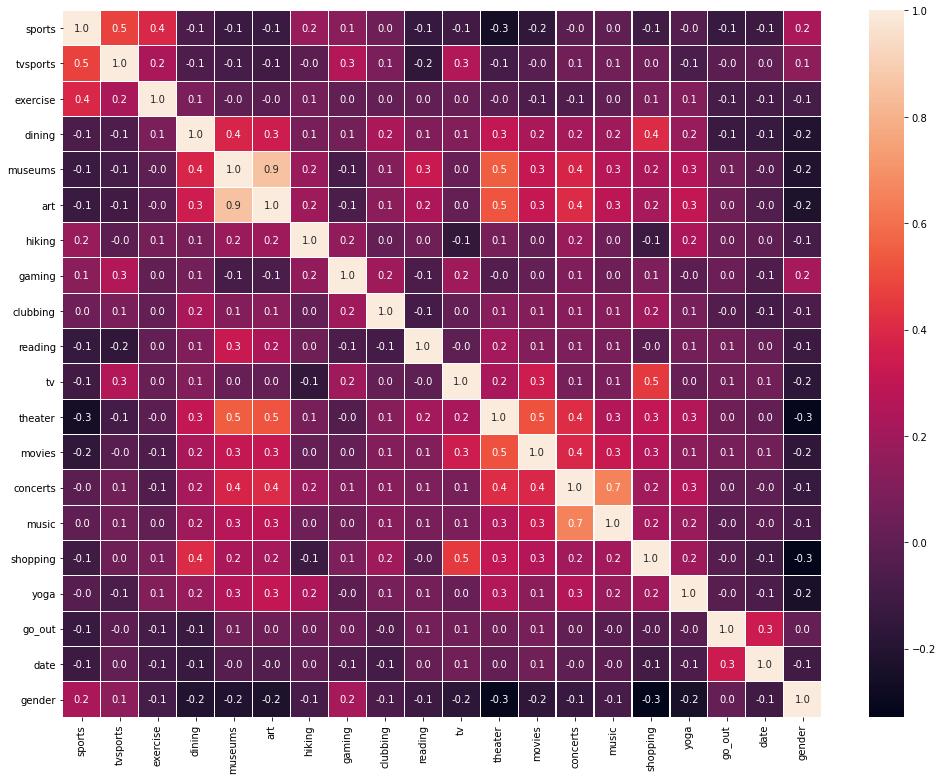

In [ ]:
x, ax= plt.subplots(figsize= (17,13))
sns.heatmap(X.corr(), annot= True, 
            linewidths= .2, fmt= ".1f", ax=ax)
plt.show()

In [ ]:

data6 = pd.read_csv("speed.csv", sep=',', engine='python')
data6.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,...,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9.0,8.0,7.0,7.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,5,15.0,1,0.21,0,24.0,3.0,30.0,10.0,20.0,10.0,10.0,20.0,1,8.0,7.0,9.0,6.0,9.0,7.0,8.0,6.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
col_call = ["you_call", "them_cal", "date_3"]
X = data6[col_call]
y = data6["date_3"]

y.fillna(value=y.mean(), inplace=True)
X.fillna(value=X.mean(), inplace=True)


/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


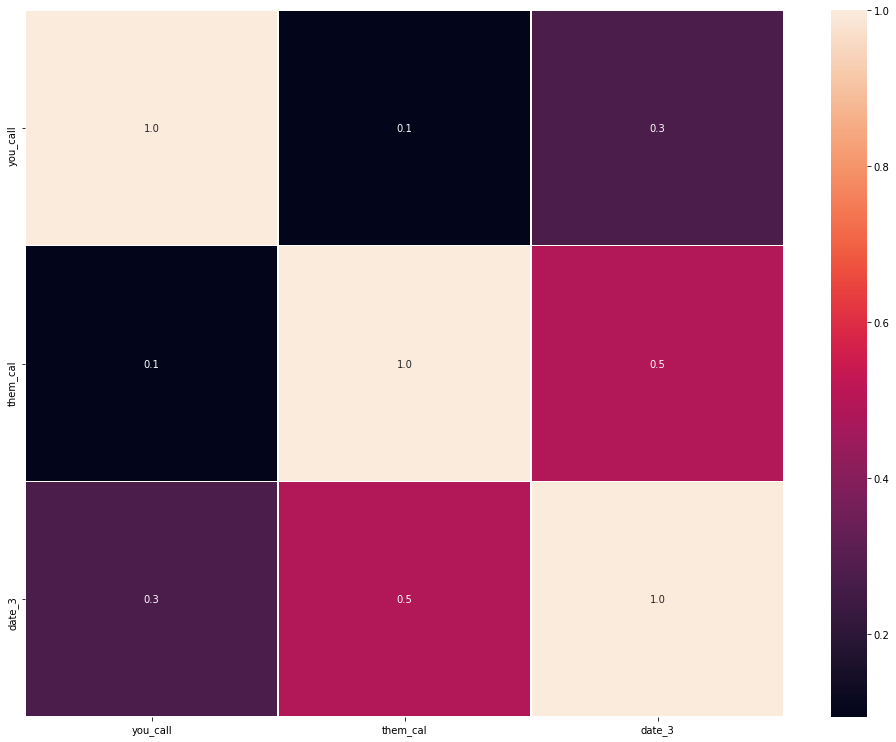

In [ ]:
x, ax= plt.subplots(figsize= (17,13))
sns.heatmap(X.corr(), annot= True, 
            linewidths= .2, fmt= ".1f", ax=ax)
plt.show()

In [ ]:
col_call = ["you_call", "them_cal"]
X = data6[col_call]
y = data6["date_3"]

y.fillna(value=y.mean(), inplace=True)
X.fillna(value=X.mean(), inplace=True)

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, random_state=1)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [ ]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, random_state=1)
regression_model = LinearRegression()
# fit the data(train the model)
regression_model.fit(X_train, y_train)
# predict
y_predicted = regression_model.predict(X_test)

# model evaluation
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

# printing values
print('The coefficient is {}'.format(regression_model.coef_))
print('The intercept is {}'.format(regression_model.intercept_))
print('Root mean squared error of the model is {}.'.format(rmse))
print('R-squared score is {}.'.format(r2))

The coefficient is [0.07115998 0.16560248]
The intercept is 0.1596512601380012
Root mean squared error of the model is 0.08043330801911974.
R-squared score is 0.2860862831787194.


In [ ]:
reg = RandomForestRegressor(random_state=42)
reg.fit(X_train, y_train)
reg.predict(X_test)


reg.score(X_test, y_test)

0.47535018397978757

In [ ]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, random_state=1)
automl = autosklearn.regression.AutoSklearnRegressor(
        time_left_for_this_task=120,
        per_run_time_limit=30,
        tmp_folder='/tmp/autosklearn2_tmp',
        output_folder='/tmp/autosklearn2_out',)

automl.fit(X_train, y_train, dataset_name='speed')
print(automl.show_models())
predictions = automl.predict(X_test)

print("R2 score:", sklearn.metrics.r2_score(y_test, predictions))


[(1.000000, SimpleRegressionPipeline({'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'no_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'minority_coalescer', 'data_preprocessing:numerical_transformer:imputation:strategy': 'mean', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'standardize', 'feature_preprocessor:__choice__': 'polynomial', 'regressor:__choice__': 'random_forest', 'data_preprocessing:categorical_transformer:category_coalescence:minority_coalescer:minimum_fraction': 0.0075899693709838454, 'feature_preprocessor:polynomial:degree': 2, 'feature_preprocessor:polynomial:include_bias': 'True', 'feature_preprocessor:polynomial:interaction_only': 'True', 'regressor:random_forest:bootstrap': 'True', 'regressor:random_forest:criterion': 'mse', 'regressor:random_forest:max_depth': 'None', 'regressor:random_forest:max_features': 1.0, 'regressor:random_forest:max_leaf_nodes': 'None', 'regressor:

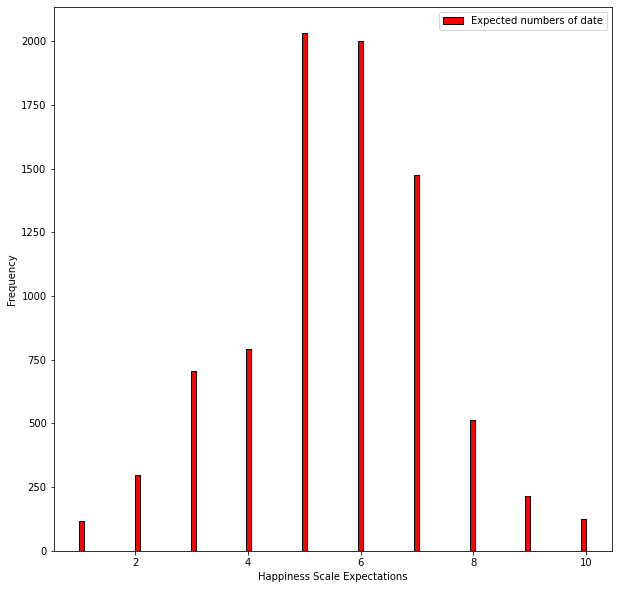

In [ ]:
expectations = data5[["exphappy", "expnum"]]
expectations.exphappy.plot(kind = "hist" , color = "red" , edgecolor="black", bins = 100 , figsize = (10,10) , label = "Expected numbers of date")
plt.legend(loc = "upper right")
plt.xlabel("Happiness Scale Expectations")
plt.show()

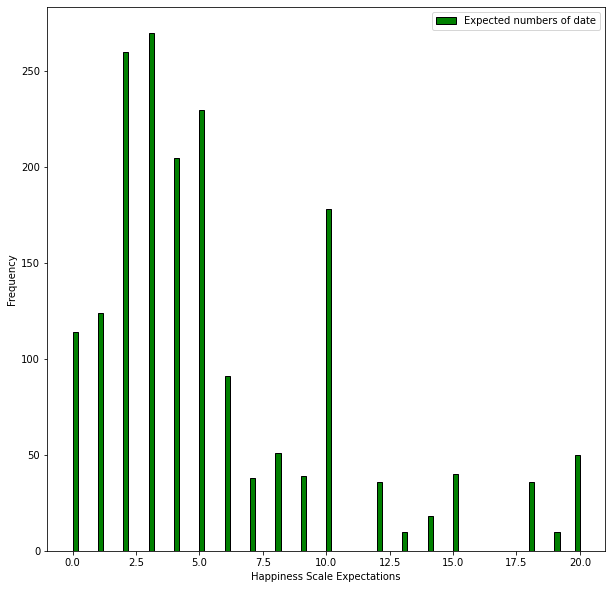

In [ ]:
expectations.expnum.plot(kind = "hist" , color = "green" , edgecolor="black", bins = 100 , figsize = (10,10) , label = "Expected numbers of date")
plt.legend(loc = "upper right")
plt.xlabel("Happiness Scale Expectations")
plt.show()

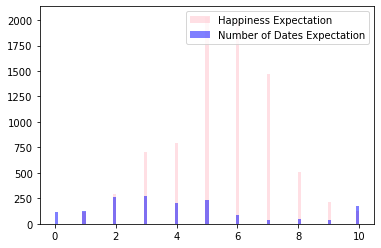

In [ ]:

x = expectations.exphappy
y = expectations.expnum

bins = np.linspace(0,10, 100)

plt.hist(x, bins, alpha=0.5, color = "pink", label='Happiness Expectation')
plt.hist(y, bins, alpha=0.5, color = "blue", label='Number of Dates Expectation')
plt.legend(loc='upper right')
plt.show()

In [ ]:
col = ["expnum", "exphappy", "gender", "age", "match"]
X = data5[col]

X.fillna(value=X.mean(), inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [ ]:
X.corr()

,expnum,exphappy,gender,age,match
expnum,1.000000,0.109035,0.005573,-0.027062,0.069510
exphappy,0.109035,1.000000,0.212551,0.045094,0.027716
gender,0.005573,0.212551,1.000000,0.070172,-0.000530
age,-0.027062,0.045094,0.070172,1.000000,-0.034832
match,0.069510,0.027716,-0.000530,-0.034832,1.000000


In [ ]:
X = X[["expnum", "exphappy","gender","age"]]
y = data5["match"]
#match is either 0 or 1, so it is classification now.

In [ ]:
X.fillna(value=X.mean(), inplace=True)
y.fillna(value=0, inplace=True)

In [ ]:
from sklearn import linear_model
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, random_state=1)

In [ ]:
from sklearn.linear_model import LogisticRegression

# Create the logistic regression model object
logistic = LogisticRegression()

# Train the model
logistic.fit(X_train, y_train)

# Check the score
logistic.score(X_train, y_train)


0.8359064141333757

In [ ]:
y_predict = logistic.predict(X_test)

In [ ]:
y_predict.sum()

0

In [ ]:
y_test.sum()

349

In [ ]:
y_predict.sum()
# So.. not cool. Everyone was "not-matched" classified. No, we can't use that.

0

In [ ]:

from sklearn import tree

# Create the logistic regression model object using information gain
decision = tree.DecisionTreeClassifier(criterion='entropy')

# Train the model
decision.fit(X_train, y_train)

# Check the score
decision.score(X_train, y_train)

y_predict = decision.predict(X_test)
y_predict.sum()

#OK, somehow works better than logistic and not all 0s.

28

In [ ]:
err_rate = (y_predict != y_test).mean()
print('Decision Tree Model Error Rate: %.2f' % err_rate)
#Cool, but still needs to be tuned.

Decision Tree Model Error Rate: 0.17


In [ ]:
from sklearn.naive_bayes import GaussianNB

# Create the Naive Bayes model object
nb = GaussianNB()

# Train the model
nb.fit(X_train, y_train)

# Check the score
nb.score(X_train, y_train)

y_predict = nb.predict(X_test)
y_predict.sum()
# better.

39

In [ ]:
err_rate = (y_predict != y_test).mean()
print('Naive Bayes Model Error Rate: %.2f' % err_rate)
#Cooler, but stays same rate. Let's move on from this set of columns, and try other kind of features with match classification

Naive Bayes Model Error Rate: 0.17


In [ ]:

X = data5[columns_hobby]
y = data5["match"]

y.fillna(value=0, inplace=True)
X.fillna(value=X.mean(), inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [ ]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, random_state=1)

In [ ]:
logistic.fit(X_train, y_train)
logistic.score(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8359064141333757

In [ ]:
predLog = logistic.predict(X_test)
predLog.sum()

0

In [ ]:
nb = GaussianNB()
nb.fit(X_train, y_train)

nb.score(X_train, y_train)

y_predict = nb.predict(X_test)
y_predict.sum()

19

In [ ]:
err_rate = (y_predict != y_test).mean()
print('Naive Bayes Model Error Rate: %.2f' % err_rate)
#Why is it always 0.17...?

Naive Bayes Model Error Rate: 0.17


In [ ]:

from sklearn.neighbors import KNeighborsClassifier

# Create the knn model object with 5 neighbors
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)

# Check the score
knn.score(X_train, y_train)

0.8359064141333757

In [ ]:
y_predict = knn.predict(X_test)
y_predict.sum()

#BEST Difference SO FAR!
#But sadly, KNN itself is not suitable for the problem domain.

164

In [ ]:
err_rate = (y_predict != y_test).mean()
print('KNN n=5 Model Error Rate: %.2f' % err_rate)
#See, error rate is even bigger than "all zeros" approach

KNN n=5 Model Error Rate: 0.20


In [ ]:
X["match"] = data5["match"]

X.corr()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,go_out,date,match
sports,1.000000,0.479965,0.396333,-0.064060,-0.126004,-0.126624,0.177109,0.128643,0.049860,-0.141269,-0.097176,-0.252943,-0.154180,-0.015553,0.003097,-0.104038,-0.030816,-0.126974,-0.114060,0.021551
tvsports,0.479965,1.000000,0.227852,-0.054278,-0.080104,-0.098732,-0.012371,0.254329,0.084676,-0.157089,0.255389,-0.088705,-0.020688,0.051440,0.058985,0.039979,-0.065364,-0.011871,0.004056,-0.004448
exercise,0.396333,0.227852,1.000000,0.085143,-0.007210,-0.014675,0.069015,0.007194,0.015275,0.007122,0.026171,-0.013915,-0.054629,-0.052006,0.003749,0.084926,0.111794,-0.083416,-0.088628,0.009419
dining,-0.064060,-0.054278,0.085143,1.000000,0.386673,0.341537,0.077145,0.061606,0.231037,0.104700,0.111967,0.305682,0.231736,0.218690,0.197483,0.406903,0.174802,-0.124539,-0.128781,0.033732
museums,-0.126004,-0.080104,-0.007210,0.386673,1.000000,0.858548,0.180012,-0.078094,0.114430,0.327652,0.026396,0.549573,0.318911,0.379148,0.271989,0.228897,0.261824,0.051146,-0.030458,0.014874
art,-0.126624,-0.098732,-0.014675,0.341537,0.858548,1.000000,0.192367,-0.064945,0.134655,0.238423,0.018157,0.527193,0.315453,0.404713,0.293376,0.218072,0.304782,0.042417,-0.043742,0.031378
hiking,0.177109,-0.012371,0.069015,0.077145,0.180012,0.192367,1.000000,0.157343,0.013731,0.042377,-0.147967,0.073997,0.015730,0.182721,0.048489,-0.115085,0.237838,0.039324,0.000476,0.024014
gaming,0.128643,0.254329,0.007194,0.061606,-0.078094,-0.064945,0.157343,1.000000,0.190855,-0.062705,0.199103,-0.040095,0.015783,0.098806,0.043301,0.093467,-0.011736,0.037651,-0.056226,0.013471
clubbing,0.049860,0.084676,0.015275,0.231037,0.114430,0.134655,0.013731,0.190855,1.000000,-0.085992,0.016893,0.121981,0.116957,0.125435,0.123750,0.196580,0.073370,-0.039207,-0.086012,0.055141
reading,-0.141269,-0.157089,0.007122,0.104700,0.327652,0.238423,0.042377,-0.062705,-0.085992,1.000000,-0.003101,0.210813,0.108737,0.091752,0.076979,-0.023544,0.068707,0.064381,0.020012,0.020115


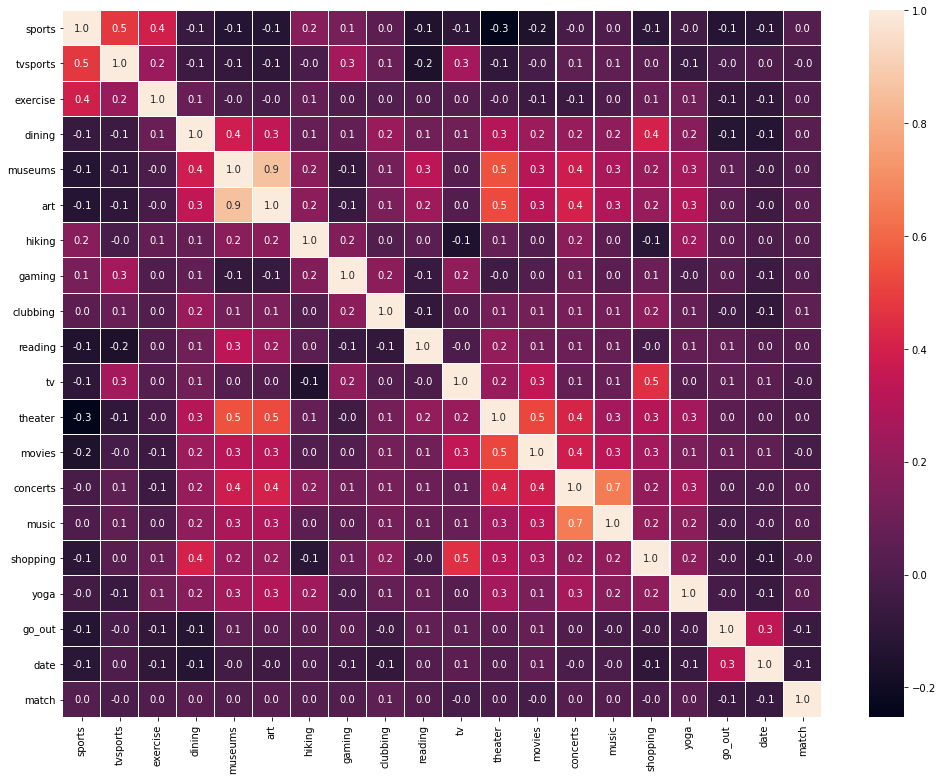

In [ ]:
x, ax= plt.subplots(figsize= (17,13))
sns.heatmap(X.corr(), annot= True, 
            linewidths= .2, fmt= ".1f", ax=ax)
plt.show()

In [ ]:
# Almost no effect... sad.

In [ ]:
X = data5[["age", "gender",
'race',
'imprace',
'imprelig',
'goal',
'date',
'go_out',
'career_c',
'dec',
'attr',
'sinc',
'intel',
'fun',
'amb',
'you_call',
'them_cal',
'date_3' ,"match"]]

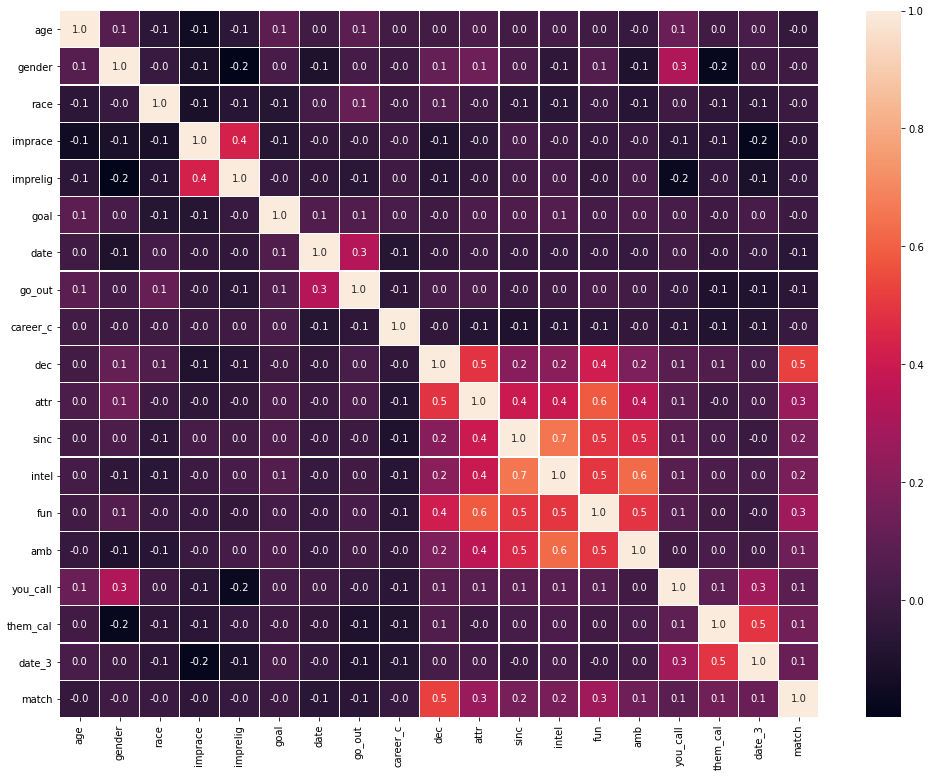

In [ ]:
x, ax= plt.subplots(figsize= (17,13))
sns.heatmap(X.corr(), annot= True, 
            linewidths= .2, fmt= ".1f", ax=ax)
plt.show()

# SO THERE IS PRETTY NICE CORRELATION MAP YOU GOT THERE

In [ ]:
X = data5[["age", "gender",
'race',
'imprace',
'imprelig',
'goal',
'date',
'go_out',
'career_c',
'dec',
'attr',
'sinc',
'intel',
'fun',
'amb',
'you_call',
'them_cal',
'date_3']]

y = data5["match"]
X.fillna(value=X.mean(), inplace=True)
y.fillna(value=0, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [ ]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, random_state=1)

In [ ]:
logistic.fit(X_train, y_train)
# Check the score
logistic.score(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8551647302244151

In [ ]:
# Train the model
decision.fit(X_train, y_train)

# Check the score
decision.score(X_train, y_train)

y_predict = decision.predict(X_test)

err_rate = (y_predict != y_test).mean()
print('Decision Tree Model Error Rate: %.2f' % err_rate)

# Whoaaa there is some progress!

Decision Tree Model Error Rate: 0.16


In [ ]:
# Train the model
nb.fit(X_train, y_train)

# Check the score
nb.score(X_train, y_train)

y_predict = nb.predict(X_test)
err_rate = (y_predict != y_test).mean()
print('Naive Bayes Model Error Rate: %.2f' % err_rate)

# Less, but there is hope! At least it is not 0.17

Naive Bayes Model Error Rate: 0.25


In [ ]:
predLog = logistic.predict(X_test)
predLog.sum()

err_rate = (predLog != y_test).mean()
print('Logistic Model Error Rate: %.2f' % err_rate)
#WOW BETTER THAN EVER. OK. I AM SATISFIED. Let's check different score types.

Logistic Model Error Rate: 0.14


In [ ]:
from sklearn.metrics import precision_recall_fscore_support

precision_recall_fscore_support(y_test, predLog, average='macro')

(0.7569617258689869, 0.6372592942690127, 0.6673722041369101, None)

In [ ]:
precision_recall_fscore_support(y_test, predLog, average='micro')

(0.8558472553699285, 0.8558472553699285, 0.8558472553699285, None)

In [ ]:
precision_recall_fscore_support(y_test, predLog, average='weighted')

(0.8355861337874931, 0.8558472553699285, 0.834334567213972, None)

In [ ]:
# Im gonna try neural network gurl:D

from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  


In [ ]:
scaler.fit(X_train) 

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
X_train = scaler.transform(X_train)

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)

clf.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 2), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
predNN = clf.predict(X_test)
predNN.sum()
# :D SAD.

0

In [ ]:
y = data5["dec"]
X = data5[columns_fundamental]
X["like"] = data5["like"]
X["prob"] = data5["prob"]


X.fillna(value=X.mean(), inplace=True)
y.fillna(value=0, inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats 

In [ ]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, random_state=1)

In [ ]:
logistic.fit(X_train, y_train)
# Check the score
logistic.score(X_train, y_train)
predLogDec = logistic.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
clf.fit(X_train, y_train)
predNN = clf.predict(X_test)



In [ ]:
err_rate = (predLogDec != y_test).mean()
print('Logistic Model Error Rate: %.2f' % err_rate)
# WHOOAAA SO DECISIVE!

Logistic Model Error Rate: 0.10


In [ ]:
X["dec"] = data5["dec"]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0.5, 0.98, 'Decide-o-meter')

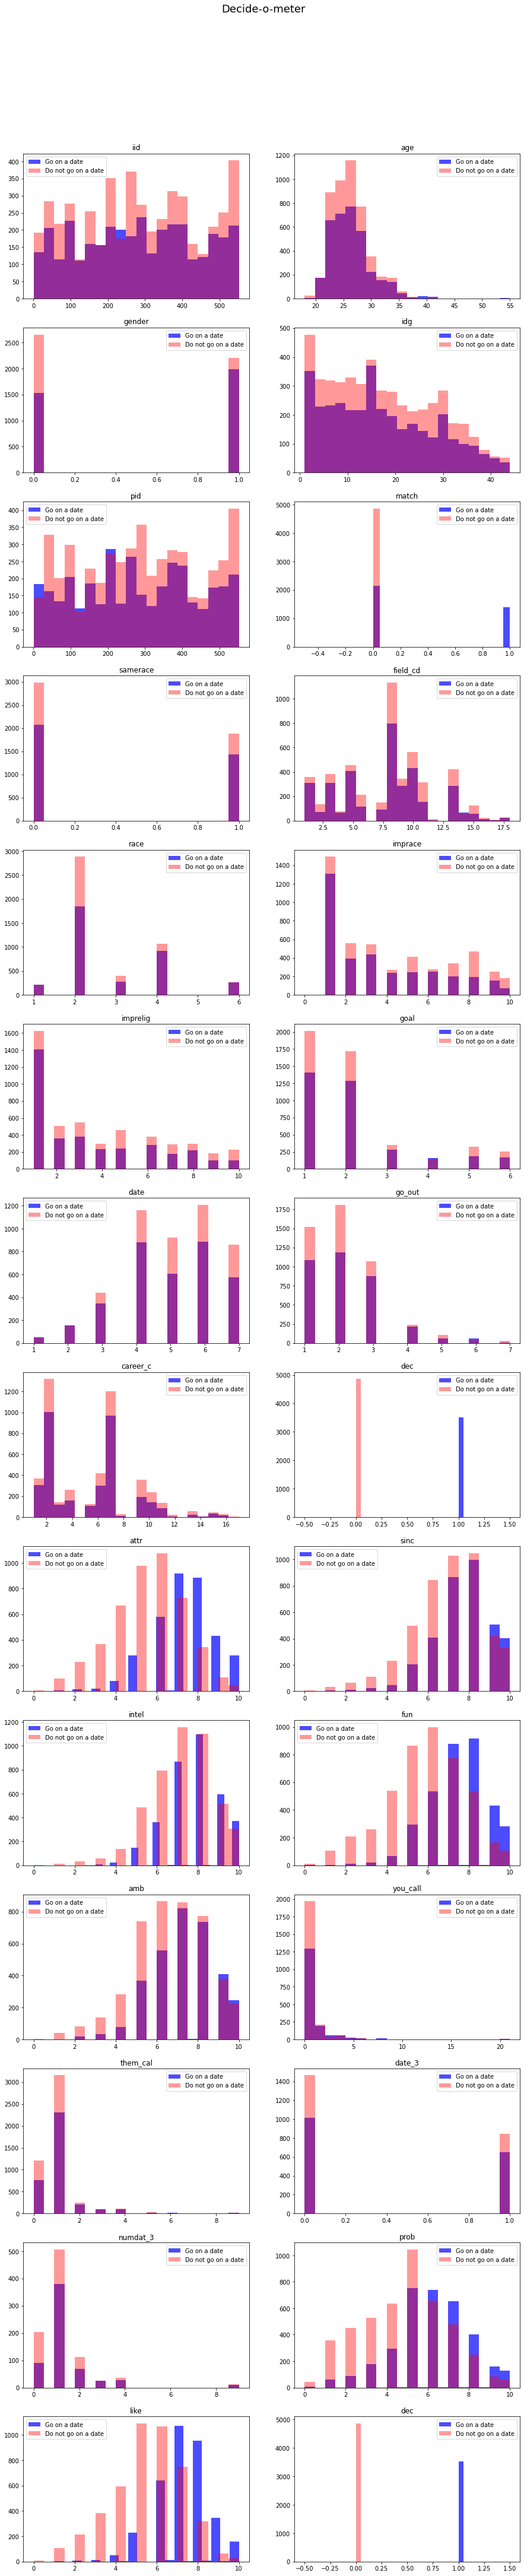

In [ ]:
columns = [
'iid',
'age',
'gender',
'idg', 
'pid',
'match',
'samerace',
'field_cd',
'race',
'imprace',
'imprelig',
'goal',
'date',
'go_out',
'career_c',
'dec',
'attr',
'sinc',
'intel',
'fun',
'amb',
'you_call',
'them_cal',
'date_3',
'numdat_3',
'prob',
'like',
'dec'
]

num = len(columns)
rows = int(num/2) + (num % 2 > 0)
fig, ax = plt.subplots(rows, 2, figsize=(15, 5 * (rows)))
i = 0
j = 0
for feat in columns:
    data5[data5.dec==1][feat].hist(label='Go on a date', ax=ax[i][j], color="blue", bins=20, alpha=0.7)
    data5[data5.dec==0][feat].hist(label='Do not go on a date', ax=ax[i][j], color = "red", bins=20, alpha=0.4)
    ax[i][j].set_title(feat, fontsize=12)
    ax[i][j].grid(False)
    ax[i][j].legend()
    j = (j+1)%2
    i = i + 1 - j
    
plt.subplots_adjust(top=0.93)
fig.suptitle('Decide-o-meter', fontsize=18)

In [ ]:

precision_recall_fscore_support(y_test, predLogDec, average='macro')

(0.895075150894989, 0.898657875046764, 0.896644711366615, None)

In [ ]:

precision_recall_fscore_support(y_test, predLogDec, average='micro')

(0.8988066825775657, 0.8988066825775657, 0.8988066825775657, None)

In [ ]:

precision_recall_fscore_support(y_test, predLogDec, average='weighted')

(0.8996879299121963, 0.8988066825775657, 0.8990350095701413, None)

**Career Codes**
1.   Lawyer
2.   Academic/Research
3. Psychologist
4. Doctor/Medicine
5. Engineer
6. Creative Arts/Entertainment 
7. Banking/Consulting/Finance/Marketing/Business/CEO/Entrepreneur/Admin 
8. Real Estate 
9. International/Humanitarian Affairs 
10. Undecided 
11. Social Work
12. Speech Pathology
13. Politics
14. Pro sports/Athletics
15. Other